# Pre-defined transport sections

The porpuses of this document is show how to pre-define sections to compute transports online. Please check the following webpage for instructions on how configure the diag_table in MOM6:

https://mom6.readthedocs.io/en/main/api/generated/pages/Diagnostics.html

The followowing manuscript provides some observation-based estimates of volume transport across sections:

Griffies et al., 2016: OMIP contribution to CMIP6: experimental and diagnostic protocol for the physical component of the Ocean Model Intercomparison Project. Geosci. Model. Dev., 9, 3231-3296. doi:10.5194/gmd-9-3231-2016'

New sections:
    
* Florida_Cuba
* Florida_Bahamas_extended
* Yucatan_Channel

Removing:

* Hormuz_Strait
* Bab_al_mandeb_Strait


In [1]:
import numpy 
import xarray as xr
import matplotlib.pyplot as plt

The diag_manager works with nominal (1D) latitude and longitude arrays. MOM6 uses a curvilinear grid that's represened using 2D latitude and longitude arrays. To correctly define a section, one needs to define the start and end points using the nominal latitude and longitude arrays as defined in MOM6 (TODO: link to module?). To bypass the need of calculating the nominal 1D arrays, we will load the static file generated by the model. Note that one needs to run the model to obtain this file. 

In [2]:
fname = '/glade/scratch/gmarques/gmom.e23.GJRAv3.TL319_t025_zstar_N65.tx1_4.004/run/gmom.e23.GJRAv3.TL319_t025_zstar_N65.tx1_4.004.mom6.static.nc'
grd = xr.open_dataset(fname)

In [3]:
%matplotlib widget

#  1 Agulhas_section
#  2 Barents_opening
#  3 Bering_Strait
#  4 Davis_Strait
#  5 Denmark_Strait
#  6 Drake_Passage
#  7 English_Channel
#  8 Fram_Strait
#  9 Florida_Bahamas
#  10 Florida_Bahamas_extended
#  11 Florida_Cuba
#  12 Gibraltar_Strait
#  13 Iceland_Norway
#  14 Indonesian_Throughflow
#  15 Mozambique_Channel
#  16 Pacific_undercurrent
#  17 Taiwan_Luzon
#  18 Windward_Passage
#  19 Robeson_Channel
#  20 Yucatan_Channel
#  21 Bosporus_Strait


Text(0.5, 1.0, 'Pre-defined sections')

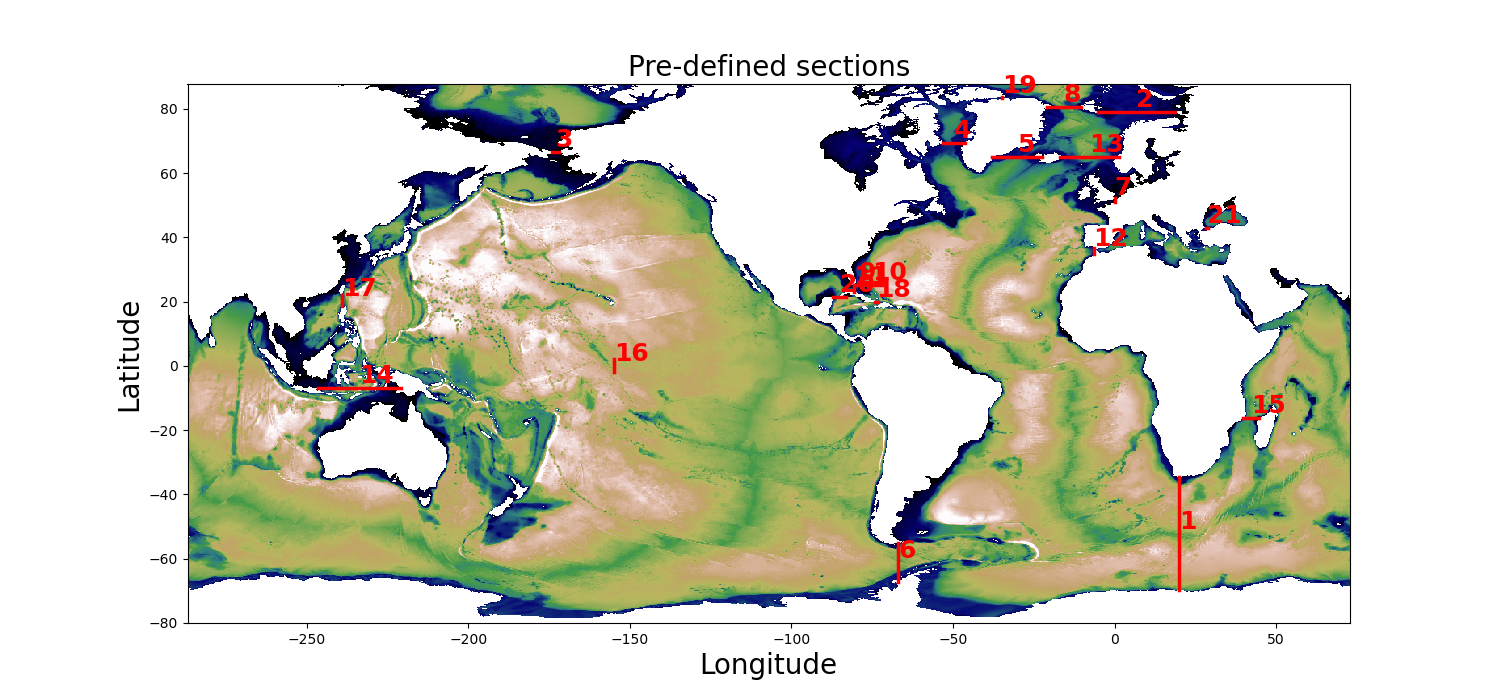

In [6]:
types = ['U50','U50','f8', 'f8','f8', 'f8']
csv = numpy.genfromtxt ('transport_sections.csv', delimiter=",", dtype=types, names=True)
name = csv['Name']
orie = csv['Orientation']
lat1 = csv['Lat1']
lat2 = csv['Lat2']
lon1 = csv['Lon1']
lon2 = csv['Lon2']

lon  = grd.xh
lat  = grd.yh
depth  = grd.deptho
depth = numpy.ma.masked_where(depth==0, depth)
xmin=lon.min(); xmax=lon.max(); ymin=lat.min(); ymax=lat.max()
plt.figure(figsize=(15, 7))
ch = plt.pcolormesh(lon,lat,depth,cmap=plt.cm.gist_earth)

for n in range(len(name)):
  print('# ',n+1, name[n])
  plt.plot([lon1[n],lon2[n]],[lat1[n],lat2[n]],'-',lw=2.5,color='r')
  plt.text((lon1[n]+lon2[n])/2, (lat1[n]+lat2[n])/2, str(n+1),fontsize=18,fontweight='bold',
            ha='left',va='bottom',color='r')
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.xlabel('Longitude', fontsize=20)
plt.ylabel('Latitude', fontsize=20)
plt.title('Pre-defined sections', fontsize=20)